In [1]:
from tensorflow import keras
from keras import layers
import pandas as pd
import numpy as np

In [2]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [3]:
#old model
model = keras.Sequential([
    data_augmentation,
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, (3, 3), activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid"),



])


In [35]:
# old model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.activations import relu
from keras.optimizers import Adam
from keras.losses import mean_squared_error
#import tensorflow as tf

model = keras.Sequential([
    data_augmentation,
    keras.layers.Rescaling(1./255),
    Conv2D(3, (5,5), strides=(2,2), activation=relu),
    #MaxPooling2D(2),
    Conv2D(24, (5, 5), strides=(2, 2), activation=relu, input_shape=(200, 200, 3)),
    #MaxPooling2D(2),
    Conv2D(36, (5, 5), strides=(2, 2), activation=relu),
    #MaxPooling2D(2),
    Conv2D(48, (3, 3), strides=(2, 2), activation=relu),
    #MaxPooling2D(2),
    Conv2D(64, (3, 3), strides=(2, 2), activation=relu),
    #MaxPooling2D(2),
    Conv2D(64, (3, 3), strides=(2, 2), activation=relu),
    #Dropout(0.5),
    Flatten(),
    Dense(1164, activation=relu),
    Dense(100, activation=relu),
    Dense(50, activation=relu),
    Dense(10, activation=relu),
    Dense(1),

])

model.compile(loss=mean_squared_error, optimizer=Adam(), metrics=['mean_squared_error', 'mean_absolute_error'])


In [9]:
import pandas as pd
import tensorflow as tf
import os

# Set the directory for your images
image_dir = './dataset/Data/Images/'
size = 2000
# Load the images into a list
X = []
for filename in os.listdir(image_dir)[:size]:
    img_path = os.path.join(image_dir, filename)
    img = tf.keras.preprocessing.image.load_img(
        img_path, target_size=(200, 200))
    X.append(tf.keras.preprocessing.image.img_to_array(img))

# Convert the list of images to a NumPy array
X = tf.convert_to_tensor(X)




In [ ]:
train_dataset_y = pd.read_csv('./dataset/Data/SteerValues/steer_values.txt',
                              delimiter="\t", header=None, names=["Steering"])

Y = tf.convert_to_tensor(
    train_dataset_y["Steering"][:size].values, dtype=tf.float32)


In [10]:
# Create a dataset from the images and labels
#dataset = tf.data.Dataset.from_tensor_slices((X, Y))

# Shuffle and batch the dataset
#batch_size = 32
#dataset = dataset.shuffle(buffer_size=len(X))
#dataset = dataset.batch(batch_size)

# Use 80% of data for training, 20% for validation
split_index = int(0.8 * len(X))
X_train, X_val = X[:split_index], X[split_index:]
Y_train, Y_val = Y[:split_index], Y[split_index:]


In [19]:
X_train.shape

TensorShape([1600, 200, 200, 3])

In [36]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    X_train, Y_train, validation_data=(X_val, Y_val),
    epochs=100,
    callbacks=callbacks)


Epoch 1/100
50/50 [==============================] - 13s 123ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0440 - val_loss: 0.0131 - val_mean_squared_error: 0.0131 - val_mean_absolute_error: 0.0612
Epoch 2/100
50/50 [==============================] - 4s 84ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0465 - val_loss: 0.0131 - val_mean_squared_error: 0.0131 - val_mean_absolute_error: 0.0610
Epoch 3/100
50/50 [==============================] - 4s 84ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0458 - val_loss: 0.0133 - val_mean_squared_error: 0.0133 - val_mean_absolute_error: 0.0561
Epoch 4/100
50/50 [==============================] - 4s 87ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0483 - val_loss: 0.0132 - val_mean_squared_error: 0.0132 - val_mean_absolute_error: 0.0577
Epoch 5/100
50/50 [==============================] - 4s 83ms/step - loss: 0.0082 - mean_square

In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 rescaling_2 (Rescaling)     (None, None, None, 3)     0         
                                                                 
 conv2d_10 (Conv2D)          (None, None, None, 24)    1824      
                                                                 
 conv2d_11 (Conv2D)          (None, None, None, 36)    21636     
                                                                 
 conv2d_12 (Conv2D)          (None, None, None, 48)    15600     
                                                                 
 conv2d_13 (Conv2D)          (None, None, None, 64)    27712     
                                                                 
 conv2d_14 (Conv2D)          (None, None, None, 64)   

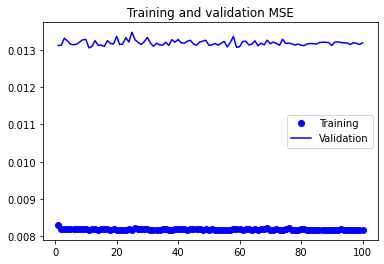

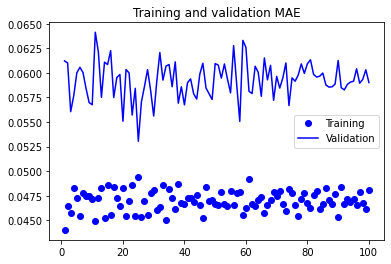

In [37]:
import matplotlib.pyplot as plt
accuracy = history.history["mean_squared_error"]
val_accuracy = history.history["val_mean_squared_error"]
loss = history.history["mean_absolute_error"]
val_loss = history.history["val_mean_absolute_error"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training")
plt.plot(epochs, val_accuracy, "b", label="Validation")
plt.title("Training and validation MSE")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training")
plt.plot(epochs, val_loss, "b", label="Validation")
plt.title("Training and validation MAE")
plt.legend()
plt.show()
